Group Members: Marisa Long and Anna Schoeny\
Link to Github: https://marisalong.github.io
# Exploratory Analysis of Alzheimer's Disease Datasets

## **Collaboration Plan**
Our team's meeting plan is to collaborate together once a week to keep up with the milestones for the final project. We plan to ideally meet in person late morning/early afternoon on Sundays. Meeting in person once a week will ensure that we are able to adequately communicate and delegate what each of us are working on and assist each other as necessary. We created a shared Github repository as our means of maintaining version control and collaboration for the project. The project board within our repository includes our to-do tasks so we are able to track our progress. 

## **Discussion of Datasets**
Our team is interested in working with datasets related to Alzheimer's disease measuring features of patients such as clinical dimension rating, years of education, normalized whole brain volume, age, socioeconomic status, and more. We are particularly interested in working with datasets relating to Alzheimer's because our families have both been personally impacted by the disease. We are currently considering working with two particular datasets that we have uncovered in our search.

The  dataset that we performed some initial EDA on for the first milestone is [MRI and Alzheimer's](https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers) taken from the [Open Access Series of Imaging Studies (OASIS)](http://www.oasis-brains.org/). This dataset includes MRI comparisons of adults with Alzheimer's and healthy adults. This dataset was initially interesting to our team because the this dataset has a high data usability score as assigned by Kaggle, which represents user ratings on the documentation of the data. This high score indicates that the data is in a state ready for our analysis. This dataset also includes both cross-sectional and longitudinal MRI data. The cross-sectional data highlights 416 subjects ranging from age 18 to 96 and details 3 to 4 MRI scans for each subject. Approximately $1\over4$ of the subjects had been diagnosed with Alzheimer's disease. The longitudinal data follows the same sample of 150 subjects aged 60 to 96. These subjects were scanned two or more times with at least a year between imaging sessions. 64 of the subjects were diagnosed with Alzheimer's disease by the time of the first scan with an additional 14 diagnosed at one of the later scan visits. Using this data, we are hoping to be able to answer questions regarding the ability to predict dementia in patients based on features such as socioeconomic status or education. For example:
- Was education a predictive feature for individuals who had dementia at the time of their first scan or who were diagnosed with dementia over the course of the study? 
- Was scioeconomic status a predictor for Alhziemer's?

<mark>TALK ABOUT DATASETS ADDED IN MILESTONE 2
    
<mark> (Include questions we want to attack, discussion of why the data we are using is correct)

#### Overarching Goal

Our hope is that through asking questions of the data, we will be able to clearly display risk factors for dementia, especially pertaining to gender. We are interested in looking into the relationships between gender, age, education, and socioeconomic status and the onset of Alhzeimer's.

## Basic ETL (Extract, Transform, and Load) and EDA (Exploratory Data Analysis)
#### REMINDER: Make sure to **PULL** before working. Also, **PUSH** work when you do something meaningful!

In [1]:
# this is just to double check that you are in the correct directory
!pwd
import warnings
warnings.filterwarnings('ignore') 
# just getting some weird warnings that we've looked into and are ignoring for now 

/Users/annaschoeny/Desktop/TU/Senior/Sem1/DataScience/marisalong.github.io


In [2]:
# importing necessary libraries for the analyzing the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Milestone 1 EDA

### Previous Dataset: MRI and Alzheimer's
Data from OASIS project

In [3]:
# Read in the longitudinal data and take a peek
df_alhz_long = pd.read_csv('./data/oasis_longitudinal.csv')
df_alhz_long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


Here are the datatypes for this dataframe:

In [4]:
df_alhz_long.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [5]:
# Looking at what type of patients make up this dataset

df_alhz_long['Group'].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

### Questions for Previous Dataset (Longitudinal):

#### What is the average level of education (variable 'EDUC') of demented vs non-demented vs converted individuals?

In [6]:
# Average Education level for demented individuals
df_alhz_long[df_alhz_long.Group == "Demented"].EDUC.mean()

13.67123287671233

In [7]:
# Average Education level for nondemented individuals
df_alhz_long[df_alhz_long.Group == "Nondemented"].EDUC.mean()

15.142105263157895

In [8]:
# Average Education level for converted individuals
df_alhz_long[df_alhz_long.Group == "Converted"].EDUC.mean()

15.45945945945946

In [9]:
# Average Education level for all individuals who ended with dementia
df_alhz_long[(df_alhz_long.Group == "Demented") | (df_alhz_long.Group == "Converted")].EDUC.mean()

14.032786885245901

One hypothesis we have based on this brief summary of education level is that education slows cognitive decline. This is suppored by the data above, where demented individuals have and average of 13.7 years, nondemented individuals have an average of 15.1 years, and converted individuals have 15.5 years. Looking at education differences among clinically demented vs nondemented individuals will help us determine how strongly education level may predict Alhzeimer's.

#### How are education and socioeconomic status related in this sample?

In [10]:
df_alhz_long["EDUC"].corr(df_alhz_long["SES"])

-0.7226472777909835

At first glance, a strong negative correlation between education level and socioeconomic status was suprising. However, when we read the publication that came out alongside this dataset, they authors explained that 'SES' is ranked using the Hollingshead Index of Social Position and has 1 being the highest status, where 5 is the lowest. Therefore, this statistic shows that individuals from a higher socioeconomic status were likely to recieve more education than those of lower socioeconomic statuses. Through our further exploration, we hope to uncover the relationship between socioeconomic status, education, and dementia.

#### How old were people in this dataset when they had their first MRI scan for dementia?

In [11]:
# Filtering data to get just the first visit
first_visit = df_alhz_long[df_alhz_long.Visit == 1]

#Take mean of age of filtered data
first_visit.Age.mean()

75.44666666666667

In [12]:
# Take standard deviation of age of filtered data
first_visit.Age.std()

7.545421000584566

The mean age of patients on their first visit was 74.4 years old, and this dataset had a standard deviation of 7.5. This shows that this dataset focuses heavily on Alhzeimer's and dementia in older individuals, rather than also considering early onset Alzheimer's. Looking at age allows us to understand the timeframe for dementia onset. 

#### How does the number of females vs males with dementia compare in this dataset?

M/F
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

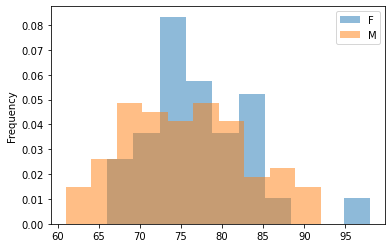

In [13]:
# Creating new dataframe with ages in accending order
age_accending_dementia = df_alhz_long.sort_values('Age')
age_accending_dementia = age_accending_dementia[age_accending_dementia.Group == "Demented"]
age_accending_dementia.groupby("M/F").Age.plot.hist(alpha=.5, density=True, legend=True, xlabel='Age of Indv. with Dementia')

Compared to the male data, the female data appears to be more right-skewed. This allows us to hypothesize that women on average are older than men when they are affected by Alhzeimer's. This is relevant to our main goal as one of the variables we are focusing on is gendered differences in Alzheimer's.

This dataset also includes cross-sectional data from the same research lab, which is included below:

In [14]:
# Read in the cross-sectional data and take a peek
df_alhz_cross = pd.read_csv('./data/oasis_cross-sectional.csv')
df_alhz_cross.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


Here are the datatypes of the dataframe:

In [15]:
df_alhz_cross.dtypes

ID        object
M/F       object
Hand      object
Age        int64
Educ     float64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
Delay    float64
dtype: object

Note: This the cross-sectional data does not have a group column that classifies the patients as demented, nondemented or converted like the longitudinal dataset does. However, they still include the Clinical Dementia Rating (CDR) that describes the level of dementia. According to the CDR, these are the classifications:
0 = no dementia, 
0.5 = very mild AD, 
1 = mild AD, 
2 = moderate AD.

To make the data more easily comparable to the longitudinal data, we used this quantitative variable to create a categorical variable with the three states.  

In [16]:
#Create a Group variable for cross-sectional data
df_alhz_cross['Group'] = df_alhz_cross['CDR'].map({
    0.0: 'Nondemented',
    0.5: 'Demented',
    1.0: 'Demented',
    1.5:'Demented',
    2.0:'Demented'
})

# Look at how many individuals fall into each category
df_alhz_cross['Group'].value_counts()

Nondemented    135
Demented       100
Name: Group, dtype: int64

### Questions for Previous Dataset (Cross Sectional):

#### What is the average level of education (variable 'EDUC') of demented vs non-demented vs converted individuals?

In [17]:
# Average Education level for demented individuals
df_alhz_cross[df_alhz_cross.Group == "Demented"].Educ.mean()

2.82

In [18]:
# Average Education level for nondemented individuals
df_alhz_cross[df_alhz_cross.Group == "Nondemented"].Educ.mean()

3.4444444444444446

This is consisted with the dataframe above, showing that on average nondemented individuals had a higher education level than the demented individuals. This does appear to be on a different scale, which we address in our commentary below. 

#### How are education and socioeconomic status related in this sample?

In [19]:
df_alhz_cross["Educ"].corr(df_alhz_cross["SES"])

-0.7423610355426756

Similar to the longitudinal data, this statistic shows that individuals from a higher socioeconomic status were likely to recieve more education than those of lower socioeconomic statuses. The correlation is also very similar, with it being -0.74 in the cross-sectional data compared to -0.72 in the longitudinal data. 

#### How old were people in this dataset when they had their MRI to scan for dementia?

In [20]:
#Take mean of age
df_alhz_cross.Age.mean()

51.357798165137616

In [21]:
# Take standard deviation of age
df_alhz_cross.Age.std()

25.269862268101562

The mean age of patients when they got their MRI scan was 51.3 years old, which is much younger than the previous dataset. This dataset also had a much bigger spread in regards to age, with the standard deviation of 25.3. This tells us that the cross-sectional dataset could contain cases of early onset Alzheimer's. This will allow us to look at a wider range of Alhzeimer's onset data.

#### How does the number of females vs males with dementia compare in this dataset?

M/F
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

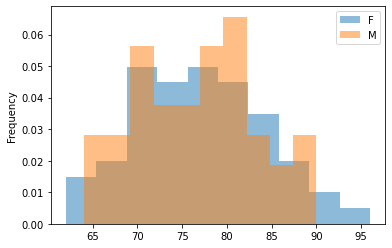

In [22]:
# Creating new dataframe with ages in accending order
age_accending_cross = df_alhz_cross.sort_values('Age')
age_accending = age_accending_cross[age_accending_cross.Group == "Demented"]
age_accending.groupby("M/F").Age.plot.hist(alpha=.5, density=True, legend=True, xlabel='Age of Indv. with Dementia')

From this graphic, we see that females have a wider range of ages. This differs from the longtidudinal data and indicates that we have to dig deeper before drawing conclusions on our gender hypothesis.






## Milestone 2 EDA

For our milestone 2 dataset, we were interested in introducing some brain imaging data to gain a further picture of what is related to cognitive decline. These two datasets are linked via the DonorID, but are currently held in separate tables.

### New Dataset: Metadata

In [23]:
# Read in the data 
df_meta_complete = pd.read_csv('./data/sea-ad_cohort_donor_metadata_082222.csv')

In [24]:
# Making a dataframe with only the columns we want to examine at this point
df_meta = df_meta_complete[['Donor ID', 'Age at Death', 'Sex', 'Race (choice=White)', 'Race (choice=Black/ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian/ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)','Hispanic/Latino', 'Highest level of education', 'Years of education', 'Cognitive Status', 'Age of onset cognitive symptoms', 'Age of Dementia diagnosis', 'Known head injury', 'Fresh Brain Weight', 'Brain pH', 'Last MMSE Score']]

Before completing our EDA, we wanted to clean up the dataframe to make it more easily readable.

In [25]:
# Want to clean up the Race columns into one simple column
df = pd.DataFrame()
df["Race (choice=White)"] = df_meta["Race (choice=White)"].map({
    'Checked': 1, 
    'Unchecked': 0
})
df["Race (choice=Black/ African American)"] = df_meta["Race (choice=Black/ African American)"].map({
    'Checked': 1, 
    'Unchecked': 0
})
df["Race (choice=Asian)"] = df_meta["Race (choice=Asian)"].map({
    'Checked': 1, 
    'Unchecked': 0
})
df["Race (choice=American Indian/ Alaska Native)"] = df_meta["Race (choice=American Indian/ Alaska Native)"].map({
    'Checked': 1, 
    'Unchecked': 0
})
df["Race (choice=Native Hawaiian or Pacific Islander)"] = df_meta["Race (choice=Native Hawaiian or Pacific Islander)"].map({
    'Checked': 1, 
    'Unchecked': 0
})
df["Race (choice=Unknown or unreported)"] = df_meta["Race (choice=Unknown or unreported)"].map({
    'Checked': 1, 
    'Unchecked': 0
})
df["Race (choice=Other)"] = df_meta["Race (choice=Other)"].map({
    'Checked': 1, 
    'Unchecked': 0
})

In [26]:
new_df = df.idxmax(axis=1)
df_meta["Race"] = new_df.values

In [27]:
df_meta.drop(['Race (choice=White)', 'Race (choice=Black/ African American)', "Race (choice=Asian)", "Race (choice=American Indian/ Alaska Native)", "Race (choice=Native Hawaiian or Pacific Islander)", "Race (choice=Unknown or unreported)", "Race (choice=Other)"], axis=1, inplace=True)

In [28]:
df_meta["Race"] = df_meta["Race"].map({
    'Race (choice=White)': "White", 
    'Race (choice=Black/ African American)': "Black/African American", 
    'Race (choice=Asian)':'Asian',
    'Race (choice=American Indian/ Alaska Native)':"American Indian/Alaska Native",
    'Race (choice=Native Hawaiian or Pacific Islander)': 'Native Hawaiian/Pacific Islander',  
    'Race (choice=Unknown or unreported)': "Unknown/Unreported",      
    'Race (choice=Other)': "Mixed" 
})

In [29]:
# Taking peak at reformatted data
df_meta.head(5)

,Donor ID,Age at Death,Sex,Hispanic/Latino,Highest level of education,Years of education,Cognitive Status,Age of onset cognitive symptoms,Age of Dementia diagnosis,Known head injury,Fresh Brain Weight,Brain pH,Last MMSE Score,Race
0,H19.33.004,80,Female,No,Bachelors,17,No dementia,NaN,NaN,NaN,1035.00,7.0,25.0,White
1,H20.33.001,82,Male,No,Bachelors,16,No dementia,NaN,NaN,NaN,1338.00,6.8,28.0,White
2,H20.33.002,90+,Female,No,High School,12,No dementia,NaN,NaN,NaN,1078.00,7.3,33.0,White
3,H20.33.004,86,Male,No,Trade School/ Tech School,15,Dementia,80,81,No,1261.00,6.7,25.0,White
4,H20.33.005,90+,Female,No,High School,12,No dementia,NaN,NaN,NaN,1003.00,6.8,29.0,White


In [30]:
# Checking the datatypes
df_meta.dtypes

Donor ID                            object
Age at Death                        object
Sex                                 object
Hispanic/Latino                     object
Highest level of education          object
Years of education                   int64
Cognitive Status                    object
Age of onset cognitive symptoms     object
Age of Dementia diagnosis           object
Known head injury                   object
Fresh Brain Weight                  object
Brain pH                           float64
Last MMSE Score                    float64
Race                                object
dtype: object

Now that our dataframe is in a cleaner version, we are able to begin our EDA. 

In [31]:
 df_meta.Sex.value_counts()

Female    51
Male      33
Name: Sex, dtype: int64

We see that this dataframe is slightly skewed in terms of sex. There are more females than males.

In [32]:
df_meta.Race.value_counts()

White    81
Asian     3
Name: Race, dtype: int64

More drastic of a skew than with sex, this dataset is almost entirely white patients, which may pose some constraints on our ability to generalize. We will keep this in mind when making any statements regarding race using this dataset, and note that this is one piece of potential missing data. 

#### Distribution of dementia by age and sex

In [33]:
# Distribution of patients with and without dementia
df_meta["Cognitive Status"].value_counts()

No dementia    42
Dementia       42
Name: Cognitive Status, dtype: int64

In [34]:
# ...and now grouped by sex
print("Female:")
print(df_meta[df_meta["Sex"] == "Female"]["Cognitive Status"].value_counts())
print("\nMale:")
print(df_meta[df_meta["Sex"] == "Male"]["Cognitive Status"].value_counts())

Female:
Dementia       27
No dementia    24
Name: Cognitive Status, dtype: int64

Male:
No dementia    18
Dementia       15
Name: Cognitive Status, dtype: int64


#### Brain pH for Dementia v. No dementia 

Sex
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Brain pH, dtype: object

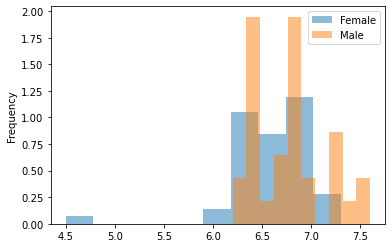

In [71]:
df_meta.groupby("Cognitive Status")['Brain pH'].plot.hist(alpha=.5, density=True, legend=True, xlabel = "Brain pH")

Based on this exploratory graph, there are several observations that can be made about brain pH as it relates to dementia diagnosis. For individuals with dementia, the mode appears at individuals with pH around 6.2-6.3, whereas individuals without dementia appear to have a peak  for individuals with a brain pH around 6.9. Ignoring the distinct outlier in the dementia patients, the spread of patients with and without dementia is around 1.5. However, the maximum pH for individuals without dementia is higher at around 7.6, whereas the max pH for individuals with dementia falls at around 7.2.  

#### Examining Education as a variable in dementia

In [37]:
print("Highest Education Level")
print(df_meta["Highest level of education"].value_counts())
print("\nYears of Education")
print(df_meta["Years of education"].value_counts())

Highest Education Level
Graduate (PhD/Masters)       25
Bachelors                    22
High School                  18
Trade School/ Tech School    15
Professional                  4
Name: Highest level of education, dtype: int64

Years of Education
16    17
18    13
12    12
21    10
15     8
14     8
17     7
13     4
20     3
19     2
Name: Years of education, dtype: int64


Average length of education for individuals with/without dementia: 

In [38]:
# Average Education level for demented individuals
print("The average number of years of education for individuals with dementia is", round(df_meta[df_meta["Cognitive Status"] == "Dementia"]["Years of education"].mean(), 2))

# Average Education level for non-demented individuals
print("The average number of years of education for individuals without dementia is", round(df_meta[df_meta["Cognitive Status"] == "No dementia"]["Years of education"].mean(), 2))

The average number of years of education for individuals with dementia is 16.62
The average number of years of education for individuals without dementia is 15.79


In [39]:
# Average Education level for females
print("The average years of education for females is", round(df_meta[df_meta["Sex"] == "Female"]["Years of education"].mean(), 2))

# Average Education level for males
print("The average years of education for males is", round(df_meta[df_meta["Sex"] == "Male"]["Years of education"].mean(), 2))

The average years of education for females is 15.98
The average years of education for males is 16.55


In [40]:
# Average Education level for females
print("The average years of education for females with dementia is", end=' ')
print(round(df_meta[(df_meta["Sex"] == "Female") & (df_meta["Cognitive Status"] == "Dementia")]["Years of education"].mean(),2))
print("The average years of education for females without dementia is", end=' ')
print(round(df_meta[(df_meta["Sex"] == "Female") & (df_meta["Cognitive Status"] == "No dementia")]["Years of education"].mean(),2))

# Average Education level for males
print("The average years of education for males with dementia is", end=' ')
print(round(df_meta[(df_meta["Sex"] == "Male") & (df_meta["Cognitive Status"] == "Dementia")]["Years of education"].mean(),2))
print("The average years of education for males without dementia is", end=' ')
print(round(df_meta[(df_meta["Sex"] == "Male") & (df_meta["Cognitive Status"] == "No dementia")]["Years of education"].mean(),2))

The average years of education for females with dementia is 16.44
The average years of education for females without dementia is 15.46
The average years of education for males with dementia is 16.93
The average years of education for males without dementia is 16.22


In [41]:
# Correlation between education and dementia

# create a numeric version of dementia column for this analysis

df_meta["cog_status_num"] = df_meta["Cognitive Status"].map({
    "Dementia": 1,
    "No dementia": 0
})


df_alhz_cross['cog_status_num'] = df_alhz_cross['Group'].map({
    'Nondemented': 0,
    'Demented': 1
})

df_alhz_long['cog_status_num'] = df_alhz_long['Group'].map({
    'Nondemented': 0,
    'Converted': 1,
    'Demented': 1
})

# correlation
print("Correlation between years of education and dementia from the meta data:")
print(df_meta["Years of education"].corr(df_meta["cog_status_num"]))
print("Correlation between years of education and dementia from oasis study...")
print("based on the cross-sectional data:", df_alhz_cross["Educ"].corr(df_alhz_cross["cog_status_num"]))
print("based on the longitudinal data:", df_alhz_long["EDUC"].corr(df_alhz_long["cog_status_num"]))

Correlation between years of education and dementia from the meta data:
0.15100381378815506
Correlation between years of education and dementia from oasis study...
based on the cross-sectional data: -0.23591049426349353
based on the longitudinal data: -0.19306010020826195


In [48]:
df_meta_dummy = pd.concat([df_meta, pd.get_dummies(df_meta["Sex"])], axis=1)
# TO DO : make a correlation matrix between certain variables and dementia
variables = ["cog_status_num", 
             "Last MMSE Score", 
             "Female",
             "Male",
             "Years of education"]
df_meta_dummy[variables].corr()

,cog_status_num,Last MMSE Score,Female,Male,Years of education
cog_status_num,1.000000,-0.498078,0.073127,-0.073127,0.151004
Last MMSE Score,-0.498078,1.000000,-0.070174,0.070174,-0.054593
Female,0.073127,-0.070174,1.000000,-1.000000,-0.100013
Male,-0.073127,0.070174,-1.000000,1.000000,0.100013
Years of education,0.151004,-0.054593,-0.100013,0.100013,1.000000


### New dataset: Volumetrics (To be connected with Metadata)

In [60]:
# Read in the data 
df_volumetrics = pd.read_csv('./data/sea-ad_cohort_mri_volumetrics.csv')

In [61]:
df_volumetrics.head()

,Donor ID,Left Thalamus Proper Volume,Left Caudate Volume,Left Putamen Volume,Left Pallidum Volume,Left Hippocampus Volume,Left Amygdala Volume,Left Accumbens Area Volume,Right Thalamus Proper Volume,Right Caudate Volume,...,Right Supramarginal White Matter Volume,Right Frontal Pole Cortex Volume,Right Frontal Pole White Matter Volume,Right Temporal Pole Cortex Volume,Right Temporal Pole White Matter Volume,Right Insula Cortex Volume,Right Insula White Matter Volume,Right Parahippocampal White Matter Volume,Right Transverse Temporal Cortex Volume,Right Transverse Temporal White Matter Volume
0,H20.33.045,6.33,2.51,3.74,2.58,2.21,0.23,0.23,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,H20.33.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H21.33.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.82,3.48,...,5.97,0.55,0.33,2.04,1.03,4.36,6.25,0.9,0.48,0.48
3,H20.33.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.99,3.62,...,9.26,0.91,0.14,1.21,0.15,7.12,5.85,0.0,0.92,0.50
4,H20.33.014,6.10,4.46,3.68,1.88,4.49,1.11,0.63,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Other ideas of things we could plot:
- a comparison of the brain volume of certain parts of the brain male v female, demented v non
- a comparision of ages - onset of symptoms, diagnosis, death
- look at differences across race
- 


My ideas for predictive models:

    - given the gender and level of education, predict the onset of Alzheimer's
    - life expectancy prediction?

<mark> Include two ideas of a model we can build 

## Challenges and Final Thoughts

#### Chalenges with MRI Dataset: Comparisions Across Datasets

1. ***Different Columns (Variables):*** The longitudinal data and cross-sectional data contained slightly different varibles from one another. For example, 'Group' only existed in one dataframe, so we had to map the Clinical Dementia Rating for each patient found in the cross-sectional data to their correpsonding group. 
2. ***'EDUC' Ambiguity:*** In the longitudinal data, the paper that was published alongside the dataset clearly states that Education Level means the number of years in formal education for that individual. However, in the cross-sectional data, the 'Educ' numbers are suspiciously low for being total years in formal education, education may be measured differently there. We must continue to dig into what the connection between these two variables may be.

####  Plan Moving Forward and What We Still Need

From here, we plan to focus on the the second dataset, which includes two dataframes of cross-sectional and longitudinal data. Our plan is to test whether there are statistically significant differences between gender and Alhzeimer's that have a across education and socioeconomic status. To supplement this data, we would like to find a dataset that contains more information on the relationships between socioeconomic status and education (perhaps breaks down this relationship into finer detail). We also plan to see if there are any gendered differences in dementia onset. Above, we began this exploration with looking at the age of onset. We plan to continue doing this at brain volume in comparision across genders and it's relation to dementia, although it would be helpful to find a dataset that included white matter mass.

##### Citations

Brfss. (2022, August 29). https://www.cdc.gov/brfss/index.html

Daniel S. Marcus, Anthony F. Fotenos, John G. Csernansky, John C. Morris, Randy L. Buckner; Open Access Series of Imaging Studies: Longitudinal MRI Data in Nondemented and Demented Older Adults. J Cogn Neurosci 2010; 22 (12): 2677–2684. https://direct.mit.edu/jocn/article/22/12/2677/4983/Open-Access-Series-of-Imaging-Studies-Longitudinal

Marcus, D. S., Wang, T. H., Parker, J., Csernansky, J. G., Morris, J. C., & Buckner, R. L. (2007). Open access series of imaging studies (Oasis): Cross-sectional mri data in young, middle aged, nondemented, and demented older adults. Journal of Cognitive Neuroscience, 19(9), 1498–1507. https://doi.org/10.1162/jocn.2007.19.9.1498

Mri and alzheimers. (n.d.). https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers


